# **Preparations**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

base_dir = '/content/drive/MyDrive/Chile Pepper'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['valid', 'train']

Contents of train directory:
['old', 'unripe', 'dried', 'ripe', 'damaged']

Contents of validation directory:
['unripe', 'ripe', 'dried', 'damaged', 'old']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training pictures
train_damaged_dir = os.path.join(train_dir, 'damaged')
train_unripe_dir = os.path.join(train_dir, 'unripe')
train_ripe_dir = os.path.join(train_dir, 'ripe')
train_dried_dir = os.path.join(train_dir, 'dried')
train_old_dir = os.path.join(train_dir, 'old')

# Directory with validation pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')
validation_unripe_dir = os.path.join(validation_dir, 'unripe')
validation_ripe_dir = os.path.join(validation_dir, 'ripe')
validation_dried_dir = os.path.join(validation_dir, 'dried')
validation_old_dir = os.path.join(validation_dir, 'old')

In [4]:
train_damaged_fnames = os.listdir(train_damaged_dir)
train_unripe_fnames = os.listdir(train_unripe_dir)
train_ripe_fnames = os.listdir(train_ripe_dir)
train_dried_fnames = os.listdir(train_dried_dir)
train_old_fnames = os.listdir(train_old_dir)

print(train_damaged_fnames[:10])
print(train_unripe_fnames[:10])
print(train_ripe_fnames[:10])
print(train_dried_fnames[:10])
print(train_old_fnames[:10])

['IMG_20220916_080344.jpg', 'IMG_20220916_080345.jpg', 'IMG_20220916_080338.jpg', 'IMG_20220916_080335.jpg', 'IMG_20220916_080431.jpg', 'IMG_20220916_080356.jpg', 'IMG_20220916_080358.jpg', 'IMG_20220916_080457.jpg', 'IMG_20220916_080446.jpg', 'IMG_20220916_080509.jpg']
['IMG_20220530_085530.jpg', 'IMG_20220530_085531.jpg', 'IMG_20220530_085533.jpg', 'IMG_20220530_085535.jpg', 'IMG_20220530_085532.jpg', 'IMG_20220530_085539.jpg', 'IMG_20220530_085548.jpg', 'IMG_20220530_085546.jpg', 'IMG_20220530_085547.jpg', 'IMG_20220530_085549.jpg']
['IMG_20220601_094318.jpg', 'IMG_20220601_094316.jpg', 'IMG_20220601_094329.jpg', 'IMG_20220601_094328.jpg', 'IMG_20220601_094330.jpg', 'IMG_20220601_094323.jpg', 'IMG_20220601_094320.jpg', 'IMG_20220601_094319.jpg', 'IMG_20220601_094332.jpg', 'IMG_20220601_094348.jpg']
['IMG_20220606_094638.jpg', 'IMG_20220606_094651.jpg', 'IMG_20220606_094650.jpg', 'IMG_20220606_094640.jpg', 'IMG_20220606_094641.jpg', 'IMG_20220606_094644.jpg', 'IMG_20220606_094713.jpg

In [5]:
print('total training `damaged` images:', len(os.listdir(train_damaged_dir)))
print('total training `unripe` images:', len(os.listdir(train_unripe_dir)))
print('total training `ripe` images:', len(os.listdir(train_ripe_dir)))
print('total training `dried` images:', len(os.listdir(train_dried_dir)))
print('total training `old` images:', len(os.listdir(train_old_dir)))

print('total validation `damaged` images:', len(os.listdir(validation_damaged_dir)))
print('total validation `unripe` images:', len(os.listdir(validation_unripe_dir)))
print('total validation `ripe` images:', len(os.listdir(validation_ripe_dir)))
print('total validation `dried` images:', len(os.listdir(validation_dried_dir)))
print('total validation `old` images:', len(os.listdir(validation_old_dir)))

total training `damaged` images: 15
total training `unripe` images: 70
total training `ripe` images: 69
total training `dried` images: 226
total training `old` images: 72
total validation `damaged` images: 18
total validation `unripe` images: 27
total validation `ripe` images: 26
total validation `dried` images: 67
total validation `old` images: 28


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 8
ncols = 4

pic_index = 0

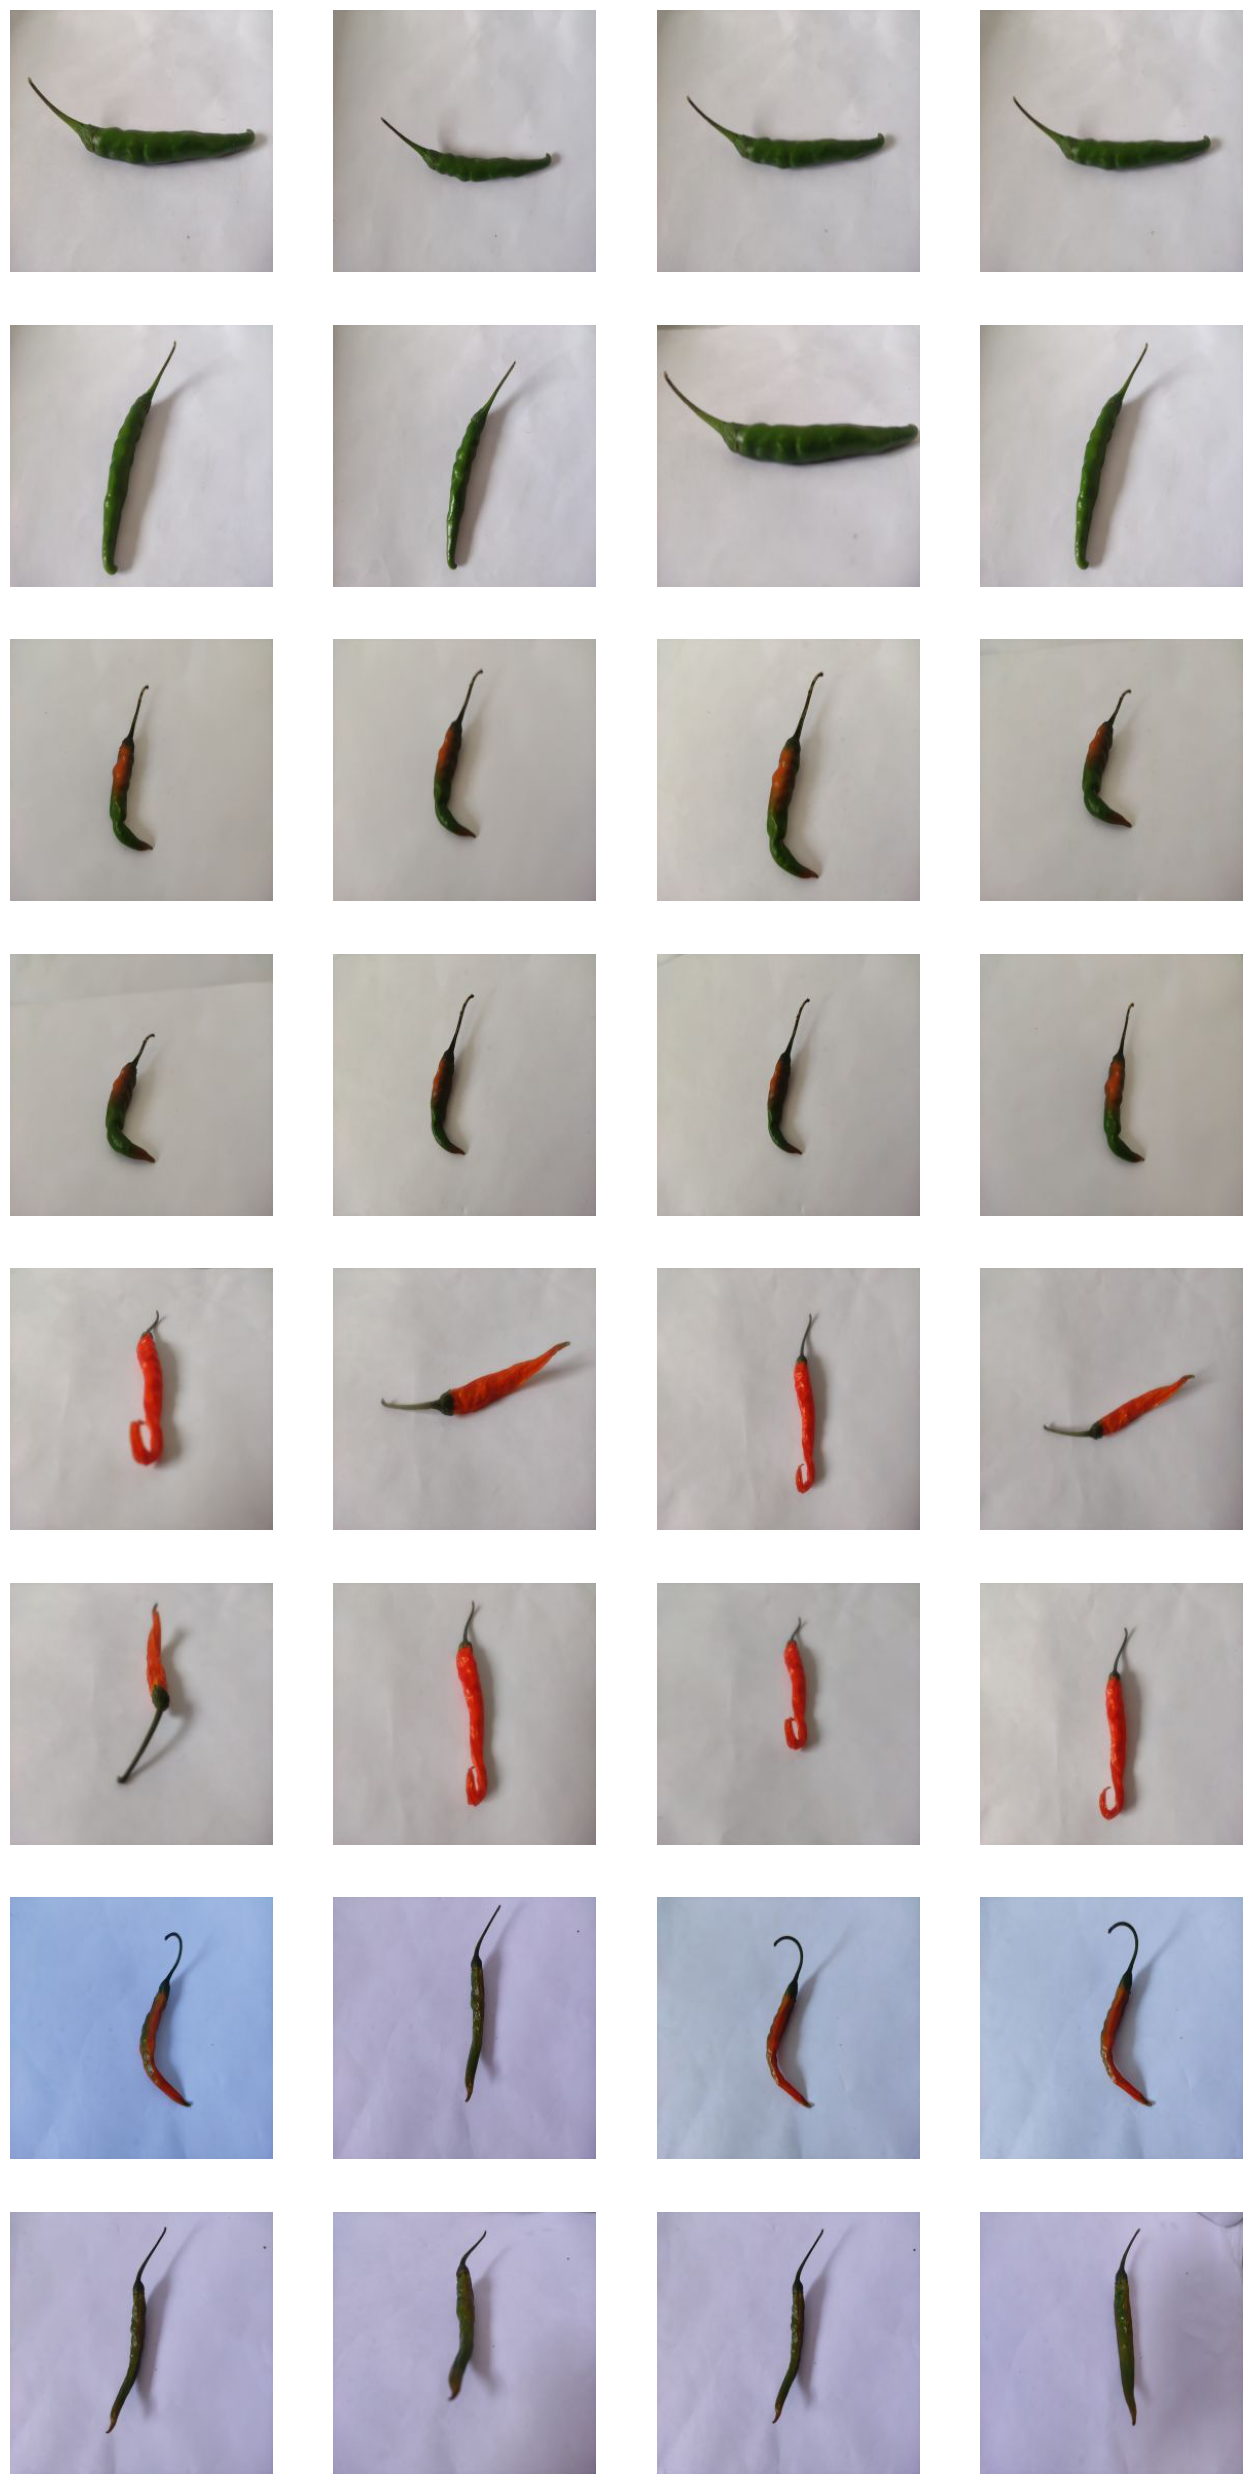

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_damaged_pix = [os.path.join(train_damaged_dir, fname) 
                for fname in train_damaged_fnames[pic_index-8 : pic_index] 
               ]

next_unripe_pix = [os.path.join(train_unripe_dir, fname) 
                for fname in train_unripe_fnames[ pic_index-8 : pic_index]
               ]

next_ripe_pix = [os.path.join(train_ripe_dir, fname) 
                for fname in train_ripe_fnames[pic_index-8 : pic_index] 
               ]

next_dried_pix = [os.path.join(train_dried_dir, fname) 
                for fname in train_dried_fnames[ pic_index-8 : pic_index]
               ]

next_old_pix = [os.path.join(train_old_dir, fname) 
                for fname in train_old_fnames[ pic_index-8 : pic_index]
               ]

for i, img_path in enumerate(next_damaged_pix + next_unripe_pix + next_ripe_pix + next_dried_pix + next_old_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [12]:
from google.colab import files

# **Self-Created Model Arch with Non-Augmented Data & No Callback(s)**

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Self-Created Model Arch with Augmented Data & Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/self_created'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Xception) with Augmented Data & Callback(s)**

In [19]:
from tensorflow.keras.applications import Xception

In [20]:
model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.layers[0].trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
____________________________________

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [24]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 452 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [25]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/xception'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [26]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 2.8583 - accuracy: 0.5199
Epoch 1: val_accuracy improved from -inf to 0.71084, saving model to /content/checkpoint/xception
15/15 [==============================] - 35s 2s/step - loss: 2.8583 - accuracy: 0.5199 - val_loss: 0.8334 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 0.7958 - accuracy: 0.6947
Epoch 2: val_accuracy did not improve from 0.71084
15/15 [==============================] - 7s 462ms/step - loss: 0.7958 - accuracy: 0.6947 - val_loss: 0.8318 - val_accuracy: 0.6205 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.5897 - accuracy: 0.7478
Epoch 3: val_accuracy improved from 0.71084 to 0.78916, saving model to /content/checkpoint/xception
15/15 [==============================] - 26s 2s/step - loss: 0.5897 - accuracy: 0.7478 - val_loss: 0.5473 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 4/50
15/15 [======================

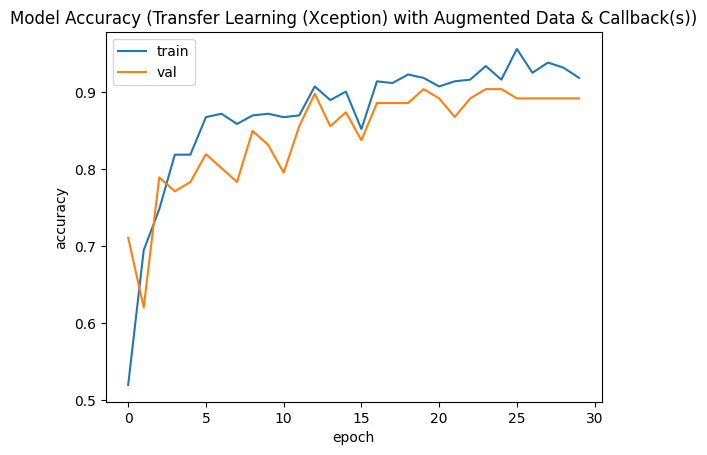

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

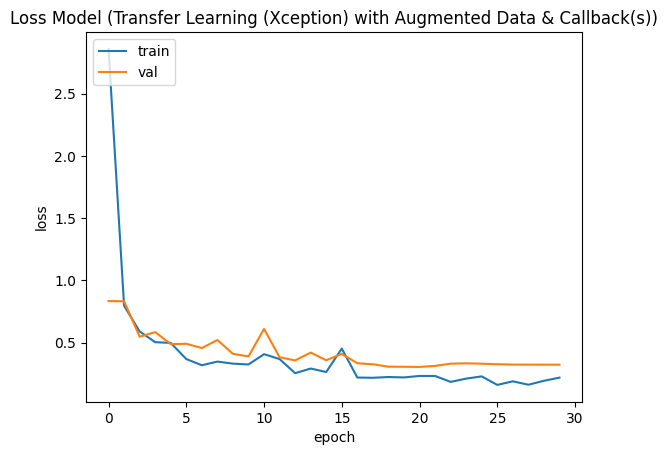

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
!zip -r /content/chilepepper_xception.zip /content/checkpoint/xception

  adding: content/checkpoint/xception/ (stored 0%)
  adding: content/checkpoint/xception/variables/ (stored 0%)
  adding: content/checkpoint/xception/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/xception/variables/variables.index (deflated 76%)
  adding: content/checkpoint/xception/assets/ (stored 0%)
  adding: content/checkpoint/xception/fingerprint.pb (stored 0%)
  adding: content/checkpoint/xception/saved_model.pb (deflated 92%)
  adding: content/checkpoint/xception/keras_metadata.pb (deflated 96%)


In [30]:
files.download("/content/chilepepper_xception.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (MobileNetV2) with Augmented Data & Callback(s)**

In [31]:
from tensorflow.keras.applications import MobileNetV2

In [32]:
model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.layers[0].trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2,587,205
Trainable params: 329,221
Non-

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [36]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 452 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [37]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/mobilenetv2'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [38]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 5.1643 - accuracy: 0.4513
Epoch 1: val_accuracy improved from -inf to 0.65060, saving model to /content/checkpoint/mobilenetv2
15/15 [==============================] - 34s 2s/step - loss: 5.1643 - accuracy: 0.4513 - val_loss: 1.3022 - val_accuracy: 0.6506 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.3956 - accuracy: 0.6637
Epoch 2: val_accuracy did not improve from 0.65060
15/15 [==============================] - 7s 489ms/step - loss: 1.3956 - accuracy: 0.6637 - val_loss: 1.4882 - val_accuracy: 0.6145 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.9411 - accuracy: 0.7257
Epoch 3: val_accuracy improved from 0.65060 to 0.75301, saving model to /content/checkpoint/mobilenetv2
15/15 [==============================] - 27s 2s/step - loss: 0.9411 - accuracy: 0.7257 - val_loss: 0.6638 - val_accuracy: 0.7530 - lr: 0.0010
Epoch 4/50
15/15 [================

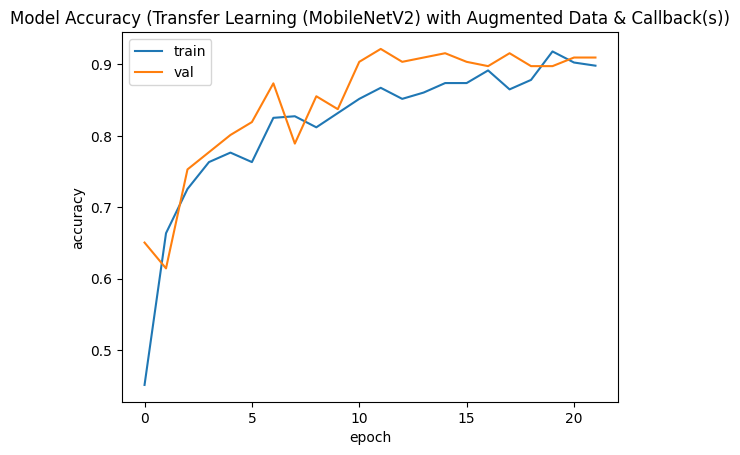

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

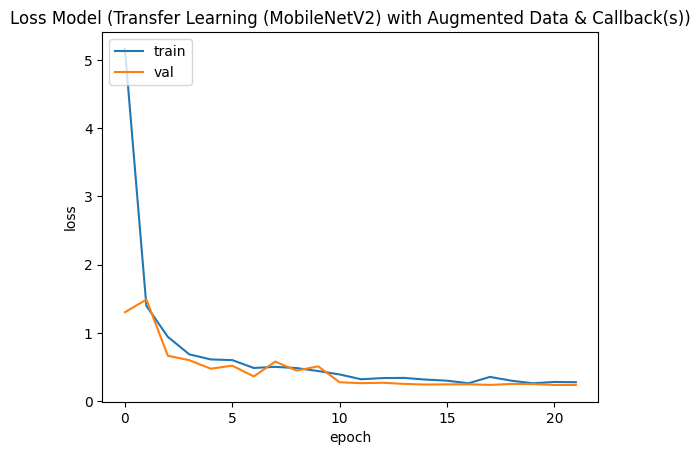

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
!zip -r /content/chilepepper_mobilenetv2.zip /content/checkpoint/mobilenetv2

  adding: content/checkpoint/mobilenetv2/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/mobilenetv2/variables/variables.index (deflated 76%)
  adding: content/checkpoint/mobilenetv2/assets/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/fingerprint.pb (stored 0%)
  adding: content/checkpoint/mobilenetv2/saved_model.pb (deflated 91%)
  adding: content/checkpoint/mobilenetv2/keras_metadata.pb (deflated 96%)


In [42]:
files.download("/content/chilepepper_mobilenetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (Densenet121) with Augmented Data & Callback(s)**

In [43]:
from tensorflow.keras.applications import DenseNet121

In [44]:
model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.layers[0].trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 7,301,189
Trainable params: 263,685
Non-trainable params: 7,037,504
______________________________________

In [46]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [48]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 452 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [49]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/densenet121'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [50]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 3.4693 - accuracy: 0.5177
Epoch 1: val_accuracy improved from -inf to 0.80120, saving model to /content/checkpoint/densenet121
15/15 [==============================] - 70s 4s/step - loss: 3.4693 - accuracy: 0.5177 - val_loss: 0.7330 - val_accuracy: 0.8012 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 0.9487 - accuracy: 0.7478
Epoch 2: val_accuracy improved from 0.80120 to 0.81928, saving model to /content/checkpoint/densenet121
15/15 [==============================] - 59s 4s/step - loss: 0.9487 - accuracy: 0.7478 - val_loss: 0.5608 - val_accuracy: 0.8193 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.8119
Epoch 3: val_accuracy did not improve from 0.81928
15/15 [==============================] - 7s 450ms/step - loss: 0.5932 - accuracy: 0.8119 - val_loss: 0.4708 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 4/50
15/15 [================

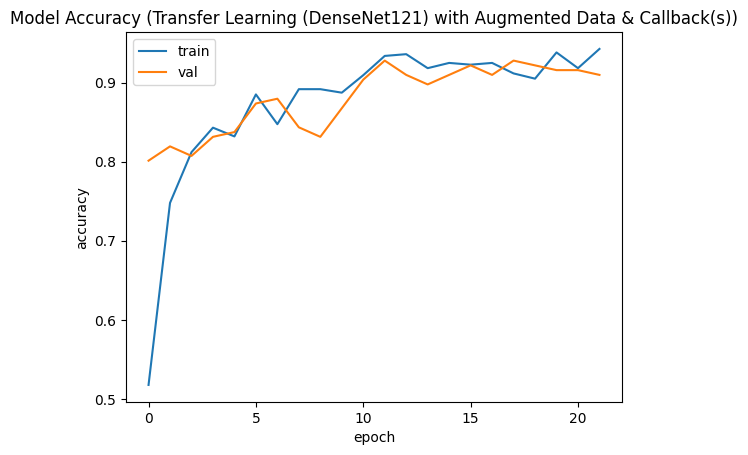

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

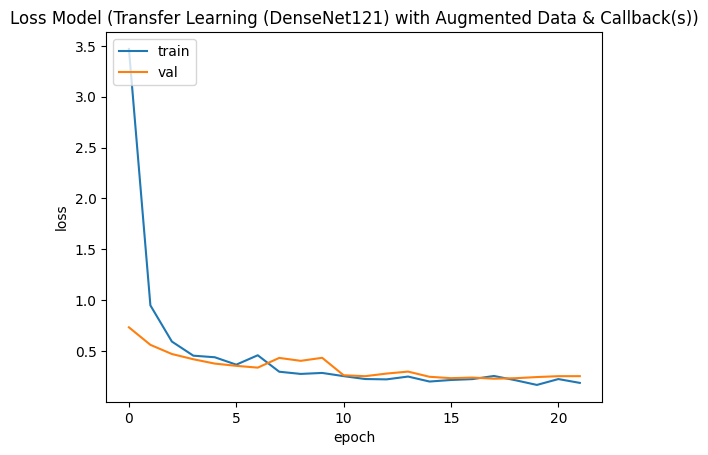

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
!zip -r /content/chilepepper_densenet121.zip /content/checkpoint/densenet121

  adding: content/checkpoint/densenet121/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/densenet121/variables/variables.index (deflated 78%)
  adding: content/checkpoint/densenet121/assets/ (stored 0%)
  adding: content/checkpoint/densenet121/fingerprint.pb (stored 0%)
  adding: content/checkpoint/densenet121/saved_model.pb (deflated 92%)
  adding: content/checkpoint/densenet121/keras_metadata.pb (deflated 96%)


In [54]:
files.download("/content/chilepepper_densenet121.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>